In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [7]:
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

from utils import encode_labels
from quantization import quantize
from decision_tree import learn_tree
from decision_tree import predict_tree
from ensemble import RandomForestClassifier

In [6]:
n_clusters = 3
dataset_path = join('datasets', 'adl')
X, labels = quantize(dataset_path, n_clusters)
y, encoder, classes = encode_labels(labels)

Sample 001 | number of observations: 395
Sample 002 | number of observations: 349
Sample 003 | number of observations: 300
Sample 004 | number of observations: 281
Sample 005 | number of observations: 718
Sample 006 | number of observations: 607
Sample 007 | number of observations: 408
Sample 008 | number of observations: 736
Sample 009 | number of observations: 334
Sample 010 | number of observations: 417
Sample 011 | number of observations: 442
Sample 012 | number of observations: 419
Sample 013 | number of observations: 304
Sample 014 | number of observations: 212
Sample 015 | number of observations: 679
Sample 016 | number of observations: 307
Sample 017 | number of observations: 439
Sample 018 | number of observations: 428
Sample 019 | number of observations: 331
Sample 020 | number of observations: 301
Sample 021 | number of observations: 460
Sample 022 | number of observations: 302
Sample 023 | number of observations: 297
Sample 024 | number of observations: 428
Sample 025 | num

Sample 202 | number of observations: 445
Sample 203 | number of observations: 386
Sample 204 | number of observations: 372
Sample 205 | number of observations: 463
Sample 206 | number of observations: 518
Sample 207 | number of observations: 502
Sample 208 | number of observations: 474
Sample 209 | number of observations: 261
Sample 210 | number of observations: 495
Sample 211 | number of observations: 292
Sample 212 | number of observations: 256
Sample 213 | number of observations: 336
Sample 214 | number of observations: 527
Sample 215 | number of observations: 343
Sample 216 | number of observations: 736
Sample 217 | number of observations: 500
Sample 218 | number of observations: 316
Sample 219 | number of observations: 381
Sample 220 | number of observations: 485
Sample 221 | number of observations: 489
Sample 222 | number of observations: 501
Sample 223 | number of observations: 699
Sample 224 | number of observations: 303
Sample 225 | number of observations: 482
Sample 226 | num

Sample 402 | number of observations: 443
Sample 403 | number of observations: 361
Sample 404 | number of observations: 455
Sample 405 | number of observations: 270
Sample 406 | number of observations: 414
Sample 407 | number of observations: 380
Sample 408 | number of observations: 412
Sample 409 | number of observations: 464
Sample 410 | number of observations: 195
Sample 411 | number of observations: 359
Sample 412 | number of observations: 382
Sample 413 | number of observations: 473
Sample 414 | number of observations: 280
Sample 415 | number of observations: 524
Sample 416 | number of observations: 386
Sample 417 | number of observations: 518
Sample 418 | number of observations: 431
Sample 419 | number of observations: 486
Sample 420 | number of observations: 378
Sample 421 | number of observations: 385
Sample 422 | number of observations: 419
Sample 423 | number of observations: 463
Sample 424 | number of observations: 270
Sample 425 | number of observations: 408
Sample 426 | num

Sample 602 | number of observations: 313
Sample 603 | number of observations: 184
Sample 604 | number of observations: 4251
Sample 605 | number of observations: 4338
Sample 606 | number of observations: 9318
Sample 607 | number of observations: 7470
Sample 608 | number of observations: 5859
Sample 609 | number of observations: 939
Sample 610 | number of observations: 812
Sample 611 | number of observations: 833
Sample 612 | number of observations: 643
Sample 613 | number of observations: 806
Sample 614 | number of observations: 742
Sample 615 | number of observations: 636
Sample 616 | number of observations: 719
Sample 617 | number of observations: 734
Sample 618 | number of observations: 818
Sample 619 | number of observations: 813
Sample 620 | number of observations: 811
Sample 621 | number of observations: 737
Sample 622 | number of observations: 587
Sample 623 | number of observations: 637
Sample 624 | number of observations: 584
Sample 625 | number of observations: 753
Sample 626 

Sample 804 | number of observations: 426
Sample 805 | number of observations: 448
Sample 806 | number of observations: 476
Sample 807 | number of observations: 372
Sample 808 | number of observations: 510
Sample 809 | number of observations: 378
Sample 810 | number of observations: 363
Sample 811 | number of observations: 394
Sample 812 | number of observations: 491
Sample 813 | number of observations: 459
Sample 814 | number of observations: 347
Sample 815 | number of observations: 380
Sample 816 | number of observations: 369
Sample 817 | number of observations: 435
Sample 818 | number of observations: 432
Sample 819 | number of observations: 406
Sample 820 | number of observations: 390
Sample 821 | number of observations: 428
Sample 822 | number of observations: 463
Sample 823 | number of observations: 355
Sample 824 | number of observations: 483
Sample 825 | number of observations: 379
Sample 826 | number of observations: 446
Sample 827 | number of observations: 398
Sample 828 | num

In [8]:
np.save('dataset.npy', X)
np.save('targets.npy', y)
joblib.dump(encoder, 'encoder.gz2')
joblib.dump(classes, 'classes.gz2')

['classes.gz2']

In [9]:
X = np.load('dataset.npy')
y = np.load('targets.npy')
encoder = joblib.load('encoder.gz2')
classes = joblib.load('classes.gz2')

In [10]:
np.random.seed(1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [18]:
random_forest = RandomForestClassifier(
    tree_funcs=(learn_tree, predict_tree),
    n_trees=1000, max_depth=7, min_leaf_size=2,
    min_split_size=5, feature_subset_size='sqrt')

In [ ]:
random_forest.fit(X_train, y_train)

In [ ]:
joblib.dump(random_forest, 'random_forest.gz2')

In [ ]:
random_forest = joblib.load('random_forest.gz2')

In [14]:
predictions = random_forest.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f'Test set accuracy: {accuracy:2.2%}')

Test set accuracy: 41.67%


In [16]:
accuracy_scores, ensemble_sizes = [], []

for n_trees in range(1, random_forest.n_trees + 1):
    predictions = random_forest.predict(X_test, n_trees=n_trees)
    accuracy = np.mean(predictions == y_test)
    accuracy_scores.append(accuracy)
    ensemble_sizes.append(n_trees)

In [94]:
accuracy_scores, ensemble_sizes = [], []

for n_trees in (1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200, 250, 500):
    print('Training random forest with %03d trees' % n_trees)
    random_forest = RandomForestClassifier(
        tree_funcs=(learn_tree, predict_tree),
        n_trees=n_trees, max_depth=7, min_leaf_size=2,
        min_split_size=5, feature_subset_size='sqrt')
    random_forest.fit(X_train, y_train)
    predictions = random_forest.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracy_scores.append(accuracy)
    ensemble_sizes.append(n_trees)

Training random forest with 001 trees
Training random forest with 005 trees
Training random forest with 010 trees
Training random forest with 015 trees
Training random forest with 020 trees
Training random forest with 025 trees
Training random forest with 030 trees
Training random forest with 040 trees
Training random forest with 050 trees
Training random forest with 075 trees
Training random forest with 100 trees
Training random forest with 150 trees
Training random forest with 200 trees
Training random forest with 250 trees
Training random forest with 500 trees


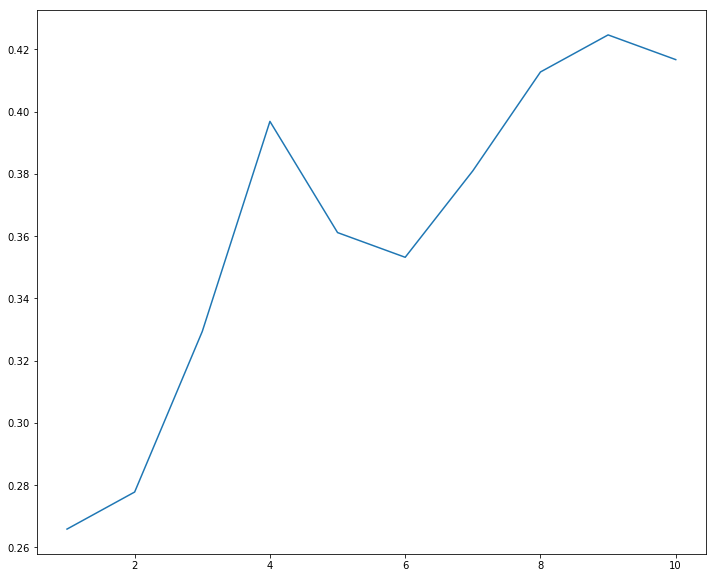

In [17]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(ensemble_sizes, accuracy_scores)